# 
# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 
This dataset has 100k records about patients and it shows if they showed up for their medical appointment or not  
column names :  
ScheduledDay : The day of the appointment  
Neighborhood : The location of the hospital   
Scholarship : If the patient is in Brasilian welfare program Bolsa Família or not  
Age : patients age  
SMS_received : if the got a message or not  

### Question(s) for Analysis
Is age a factor ?  
does having a scholarship make a difference ?  
does receiving an sms make a difference?  
does neighborhood make a difference?  


In [78]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [79]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties
In this step we check the data and look around if anything needs cleaning or changing 
but this dataset looks clean with minor issues 

In [81]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshow.csv')

In [82]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [83]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [84]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [86]:
df.shape

(110527, 14)


### Data Cleaning

 

### dropping unnecessary columns
In this step we remove columns that carry no meaning to the analysis 
and potentially contain personal information about patients
 

In [87]:
# dropping unnecessary columns 
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No



### Fixing Typos
we can see here that there are some typos in the naming of the columns 
that need correction 

 

In [88]:
#Fixing Typos
df.rename(columns={'Hipertension': 'Hypertension ', 'Handcap': 'Handicap ','No-show': 'Noshow'}, inplace=True)
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No



### dropping negative age values
when we check the data we find a min value of -1
and 0 values
we drop those

 

In [89]:
# dropping negative age values
df = df.drop(df[df['Age'] < 1].index)
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No



### making it easier to graph
changing yes and no to 0s and 1s makes it easier to deal with the data

 

In [90]:
df["Noshow"].replace({"No": 1, "Yes": 0}, inplace=True)

In [91]:
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,1
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,0
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,0
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,1
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,1


In [92]:
showed = df.Noshow == True
no_show = df.Noshow == False

In [1]:
# a function that shows percentage
def p(a, b):
    return round(a / b * 100, 2)

<a id='eda'></a>
## Exploratory Data Analysis




### Is age a factor in patients showing up ?

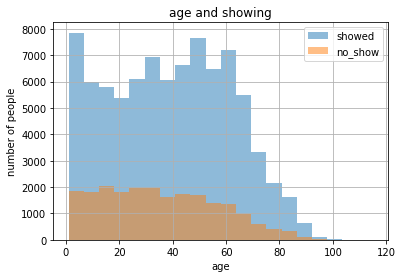

In [93]:
# this graph shows people who showed up vs those who didnt and their ages
df.Age[showed].hist(alpha=0.5, bins=20, label='showed')
df.Age[no_show].hist(alpha=0.5, bins=20, label='no_show')
plt.xlabel('age')
plt.ylabel('number of people')
plt.title('age and showing')
plt.legend();

Is age a factor in patients showing up ?  
in this visualization we see that age is a contributing factor   
It seems that young children and older adults tend to show up more With the mean of people showing tending to be higher

In [94]:
df.Age[showed].mean()

39.075187264820002

In [95]:
df.Age[no_show].mean()

35.329151291512915

#### it seems that young children and older adults tend to show up more

### does having a scholarship make a difference ?

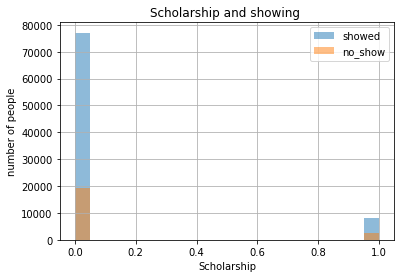

In [96]:
# this graph shows the show up rate of people with a scholarship and those without 
df.Scholarship[showed].hist(alpha=0.5, bins=20, label='showed')
df.Scholarship[no_show].hist(alpha=0.5, bins=20, label='no_show')
plt.xlabel('Scholarship')
plt.ylabel('number of people')
plt.title('Scholarship and showing ')
plt.legend();

people with a scholarship tend to show up slightly less (76% show up rate) vs those who dont have it (80% show up rate)

In [97]:
df.groupby('Scholarship')['Noshow'].value_counts()

Scholarship  Noshow
0            1         77069
             0         19109
1            1          8238
             0          2571
Name: Noshow, dtype: int64

In [2]:
# percentage of people without a scholarship showing 
print(p(77069, 77069+19109))

80.13


In [3]:
# percentage of people a scholarship showing 
print(p(8238, 8238+2571))

76.21


### does neighborhood make a difference?

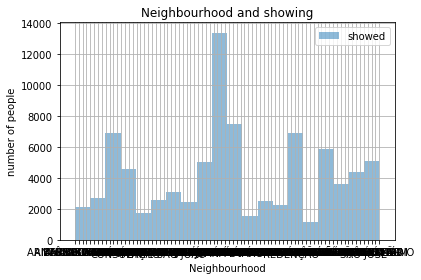

In [118]:
# this graph represents people who show up in certian neighbourhoods 
df.Neighbourhood[showed].hist(alpha=0.5, bins=20, label='showed')
plt.xlabel('Neighbourhood')
plt.ylabel('number of people')
plt.title('Neighbourhood and showing')
plt.legend();

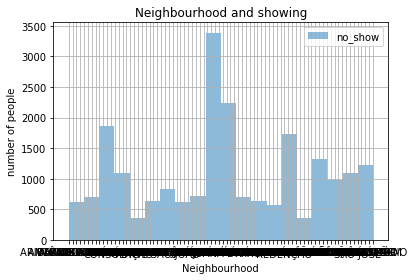

In [113]:
## this graph represents people who dont show up in certian neighbourhoods 
df.Neighbourhood[no_show].hist(alpha=0.5, bins=20, label='no_show')
plt.xlabel('Neighbourhood')
plt.ylabel('number of people')
plt.title('Neighbourhood and showing')
plt.legend();

as we can see from these graphs neighborhood is significantly correlated with showing up

### does receiving an sms make a difference?

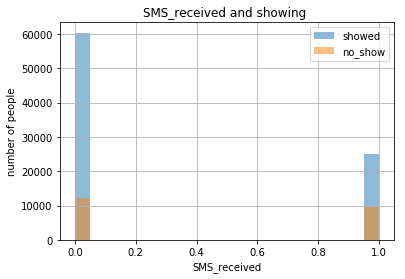

In [102]:
# this graph shows people who show up when receiving an sms and those who dont
#on the other side you have showing up rates of people without any sms at all
df.SMS_received[showed].hist(alpha=0.5, bins=20, label='showed')
df.SMS_received[no_show].hist(alpha=0.5, bins=20, label='no_show')
plt.xlabel('SMS_received')
plt.ylabel('number of people')
plt.title('SMS_received and showing ')
plt.legend();

less people show up when receiving sms (72% show up rate) vs those who didn't receive (83% show up rate)

In [103]:
df.groupby('SMS_received')['Noshow'].value_counts()

SMS_received  Noshow
0             1         60290
              0         12112
1             1         25017
              0          9568
Name: Noshow, dtype: int64

In [4]:
#no SMS_received 
print(p(60290, 60290+ 12112))

83.27


In [5]:
#with SMS_received 
print(p(25017, 25017+ 9568))

72.33


#### It seems that even less people show up when receiving an sms
 but It's only a small percentage who received it so its not very reliable 

### Diabetes and showing up

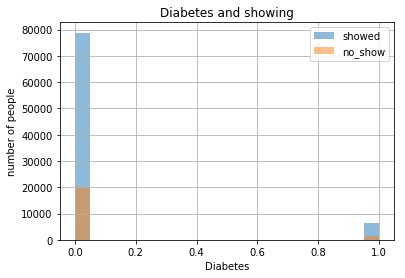

In [106]:
#on the left side we have show-up rates of non-diabeteics
#on the right hand side we have show-up rates of diabeteics 
df.Diabetes[showed].hist(alpha=0.5, bins=20, label='showed')
df.Diabetes[no_show].hist(alpha=0.5, bins=20, label='no_show')
plt.xlabel('Diabetes')
plt.ylabel('number of people')
plt.title('Diabetes and showing')
plt.legend();

In [ ]:
no significant correlation in Diabetes

In [107]:
df.groupby('Diabetes')['Noshow'].value_counts()

Diabetes  Noshow
0         1         78794
          0         20250
1         1          6513
          0          1430
Name: Noshow, dtype: int64

In [6]:
#percentage of non-diabeteics showing 
print(p(78794, 78794+20250))

79.55


In [7]:
#percentage of diabeteics showing
print(p(6513, 6513+1430))

82.0


#### no significant correlation 

### general overview 

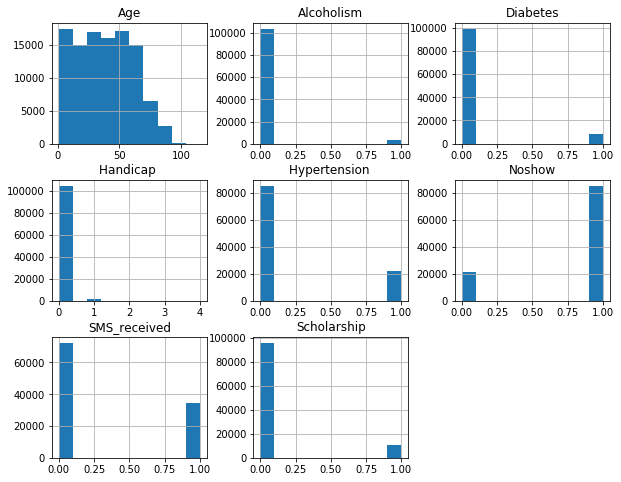

In [110]:
# a general overview of the dataset 
df.hist(figsize=(10,8));

we see that only a minority have a chronic illness or have an addiction  
also a smaller number of people have a scolarship

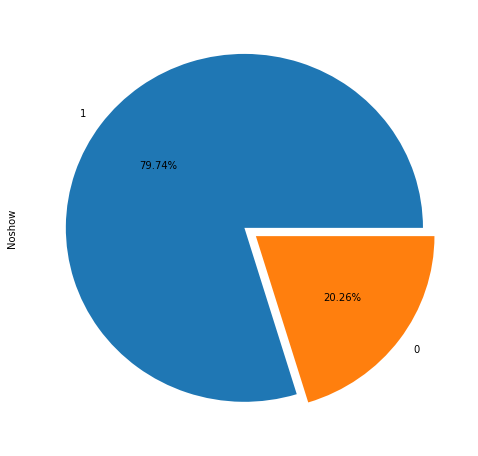

In [111]:
# showing vs not showing in the entire dataset
df.Noshow.value_counts().plot.pie(figsize=(8,8), autopct='%.2f%%', explode=(0, .08))
plt.show()

<a id='conclusions'></a>
## Conclusions
*It seems that young children and older adults tend to show up more 
With the mean of people showing tending to be higher  
*people with a scholarship tend to show up slightly less (76% show up rate) vs those who dont have it (80% show up rate)  
*neighborhood is significantly correlated with showing up  
*less people show up when receiving sms (72% show up rate) vs those who didn't receive (83% show up rate)  
*no significant correlation in Diabetes

### Limitations
one limitation of this dataset is that age contained negative and 0 values that had to be eliminated or dropped   
another limitation is that we could only make correlations without knowing its causal relation in things like neighborhood   
It would have been helpful to include where it is in relation to patients location (distance)  


In [8]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0